In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode
import os
os.chdir('/Users/fulinq/Documents/SET_Intern/SOMC/TradingData')

In [3]:
df = pd.read_csv(r"Waiting_for_groupby.csv")

In [4]:
se = pd.read_csv(r"SET 50 Historical Data (5).csv")

In [5]:
se

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2024,906.23,910.62,915.79,905.96,807.32M,-0.29%
1,12/27/2024,908.90,906.94,916.00,904.10,729.34M,0.27%
2,12/26/2024,906.41,906.77,909.57,903.59,757.57M,-0.08%
3,12/25/2024,907.17,907.45,910.27,904.22,1.05B,0.30%
4,12/24/2024,904.44,902.36,906.79,900.32,779.47M,0.50%
...,...,...,...,...,...,...,...
964,01/08/2021,977.59,965.70,977.59,964.91,3.00B,2.32%
965,01/07/2021,955.39,952.69,959.29,946.05,4.56B,1.59%
966,01/06/2021,940.41,951.94,957.42,935.88,3.41B,-1.42%
967,01/05/2021,953.99,923.20,953.99,921.51,2.93B,3.21%


In [6]:
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

end_date_dict = df.groupby('END_DATE')['NAME'].unique().apply(list).to_dict()


In [7]:
for i, (end_date, sub_df) in enumerate(df.groupby('END_DATE'), start=1):
    globals()[f"df_{i}"] = sub_df.reset_index(drop=True)

In [8]:
df_1

,END_DATE,NAME,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,2021-01-11 00:00:00,2021-01-12 00:00:00,2021-01-13 00:00:00,...,2024-12-17 00:00:00,2024-12-18 00:00:00,2024-12-19 00:00:00,2024-12-20 00:00:00,2024-12-23 00:00:00,2024-12-24 00:00:00,2024-12-25 00:00:00,2024-12-26 00:00:00,2024-12-27 00:00:00,2024-12-30 00:00:00
0,2021-01-29,S50F21C1000,4.9,11.6,7.6,10.5,17.4,13.9,12.9,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-29,S50F21C1025,2.5,6.6,4.0,5.7,10.1,7.4,6.6,6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-29,S50F21C1050,1.1,3.5,2.0,2.9,5.5,3.6,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-29,S50F21C1075,NaN,NaN,NaN,NaN,NaN,1.6,1.3,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-29,S50F21C650,272.6,302.4,289.0,304.0,326.2,323.8,324.5,329.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-01-29,S50F21C675,247.6,277.4,264.0,279.0,301.2,298.8,299.5,304.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-01-29,S50F21C700,222.6,252.4,239.0,254.0,276.2,273.8,274.5,279.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-01-29,S50F21C725,197.7,227.4,214.0,229.0,251.2,248.8,249.5,254.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-01-29,S50F21C750,172.7,202.4,189.0,204.0,226.2,223.8,224.5,229.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-01-29,S50F21C775,147.8,177.5,164.1,179.0,201.3,198.8,199.5,204.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for i in range(1, 55):
    df = globals()[f'df_{i}']

    # 1. Drop columns that are entirely NaN BEFORE melt
    df = df.dropna(axis=1, how='all')

    # 2. Melt: convert wide to long
    df_melted = df.melt(id_vars=['END_DATE', 'NAME'], var_name='Date', value_name='Price')

    # 3. Convert Date to datetime
    df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')

    # 4. Pivot: Date as row index, NAME as column
    df_pivoted = df_melted.pivot(index='Date', columns='NAME', values='Price')

    # 5. Sort for neatness
    df_pivoted = df_pivoted.sort_index().sort_index(axis=1)

    # 6. Save back to globals
    globals()[f'df_{i}'] = df_pivoted


In [10]:
df_1

NAME,S50F21C1000,S50F21C1025,S50F21C1050,S50F21C1075,S50F21C650,S50F21C675,S50F21C700,S50F21C725,S50F21C750,S50F21C775,...,S50F21P750,S50F21P775,S50F21P800,S50F21P825,S50F21P850,S50F21P875,S50F21P900,S50F21P925,S50F21P950,S50F21P975
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,4.90,2.50,1.10,NaN,272.60,247.60,222.60,197.70,172.70,147.80,...,0.10,0.20,0.60,1.80,4.30,9.10,16.90,28.30,43.20,61.40
2021-01-05,11.60,6.60,3.50,NaN,302.40,277.40,252.40,227.40,202.40,177.50,...,0.10,0.10,0.20,0.70,2.00,4.50,9.20,16.60,27.40,41.70
2021-01-06,7.60,4.00,2.00,NaN,289.00,264.00,239.00,214.00,189.00,164.10,...,0.10,0.10,0.30,1.00,2.60,5.90,11.70,20.70,33.40,49.50
2021-01-07,10.50,5.70,2.90,NaN,304.00,279.00,254.00,229.00,204.00,179.00,...,0.10,0.10,0.10,0.50,1.40,3.50,7.60,14.50,24.90,39.00
2021-01-08,17.40,10.10,5.50,NaN,326.20,301.20,276.20,251.20,226.20,201.30,...,0.10,0.10,0.10,0.20,0.60,1.60,4.00,8.40,15.80,26.60
2021-01-11,13.90,7.40,3.60,1.60,323.80,298.80,273.80,248.80,223.80,198.80,...,0.10,0.10,0.10,0.10,0.30,1.10,3.00,7.00,14.10,25.10
2021-01-12,12.90,6.60,3.00,1.30,324.50,299.50,274.50,249.50,224.50,199.50,...,0.10,0.10,0.10,0.10,0.20,0.80,2.40,5.90,12.70,23.40
2021-01-13,13.60,6.80,3.00,1.20,329.80,304.80,279.80,254.80,229.80,204.80,...,0.10,0.10,0.10,0.10,0.10,0.40,1.50,4.30,10.00,19.60
2021-01-14,9.50,4.30,1.70,0.60,320.40,295.40,270.40,245.40,220.40,195.50,...,0.10,0.10,0.10,0.10,0.10,0.50,1.80,5.10,11.80,23.10


In [11]:
def extract_strike(name):
    match = re.search(r'(\d+)$', name)
    return float(match.group(1)) if match else np.nan

In [12]:
for i in range(1, 55):
    name = f'df_{i}'
    if name in globals():
        df = globals()[name].copy()  # สำรองข้อมูล

        # สร้าง mapping: column → strike
        strike_map = {col: extract_strike(col) for col in df.columns}

        # แปลงราคาเป็น strike โดยไม่แตะ NaN
        for col in df.columns:
            strike = strike_map[col]
            df[col] = df[col].apply(lambda x: strike if pd.notna(x) else np.nan)

        # เขียนกลับเข้า globals
        globals()[f'{name}_1'] = df

In [13]:
df_5_1

NAME,S50K21C1000,S50K21C1025,S50K21C1050,S50K21C1075,S50K21C825,S50K21C850,S50K21C875,S50K21C900,S50K21C925,S50K21C950,...,S50K21P1025,S50K21P1050,S50K21P1075,S50K21P825,S50K21P850,S50K21P875,S50K21P900,S50K21P925,S50K21P950,S50K21P975
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-24,1000.0,1025.0,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,...,1025.0,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-02-25,1000.0,1025.0,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,...,1025.0,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-03-01,1000.0,1025.0,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,...,1025.0,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-03-02,1000.0,1025.0,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,...,1025.0,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-03-03,1000.0,1025.0,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,...,1025.0,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-03-04,1000.0,1025.0,1050.0,1075.0,825.0,850.0,875.0,900.0,925.0,950.0,...,1025.0,1050.0,1075.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-03-05,1000.0,1025.0,1050.0,1075.0,825.0,850.0,875.0,900.0,925.0,950.0,...,1025.0,1050.0,1075.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-03-08,1000.0,1025.0,1050.0,1075.0,825.0,850.0,875.0,900.0,925.0,950.0,...,1025.0,1050.0,1075.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2021-03-09,1000.0,1025.0,1050.0,1075.0,825.0,850.0,875.0,900.0,925.0,950.0,...,1025.0,1050.0,1075.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0


In [14]:
se['Date'] = pd.to_datetime(se['Date'])  # แปลงเป็น datetime ก่อน
se.set_index('Date', inplace=True)       # ตั้งเป็น index

In [15]:
for i in range(1, 55):
    strike_df_name = f'df_{i}_1'
    
    if strike_df_name in globals():
        df_strike = globals()[strike_df_name].copy()

        # Ensure date alignment
        common_dates = df_strike.index.intersection(se['Price'].index)
        df_strike = df_strike.loc[common_dates]
        S_series = se['Price'].loc[common_dates]
        S_series = pd.to_numeric(S_series, errors='coerce')  # make sure it's float

        df_payoff = pd.DataFrame(index=df_strike.index, columns=df_strike.columns)

        for col in df_strike.columns:
            K_series = pd.to_numeric(df_strike[col], errors='coerce')
            option_type = 'C' if 'C' in col else 'P'

            if option_type == 'C':
                payoff = S_series - K_series
            else:
                payoff = K_series - S_series

            # Apply max(..., 0)
            payoff = payoff.clip(lower=0)

            # Apply only where strike isn't NaN
            df_payoff[col] = payoff.where(df_strike[col].notna())

        globals()[f'df_{i}_2'] = df_payoff

In [16]:
df_1_2

NAME,S50F21C1000,S50F21C1025,S50F21C1050,S50F21C1075,S50F21C650,S50F21C675,S50F21C700,S50F21C725,S50F21C750,S50F21C775,...,S50F21P750,S50F21P775,S50F21P800,S50F21P825,S50F21P850,S50F21P875,S50F21P900,S50F21P925,S50F21P950,S50F21P975
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.0,0.0,0.0,NaN,274.36,249.36,224.36,199.36,174.36,149.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,25.64,50.64
2021-01-05,0.0,0.0,0.0,NaN,303.99,278.99,253.99,228.99,203.99,178.99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,21.01
2021-01-06,0.0,0.0,0.0,NaN,290.41,265.41,240.41,215.41,190.41,165.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9.59,34.59
2021-01-07,0.0,0.0,0.0,NaN,305.39,280.39,255.39,230.39,205.39,180.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,19.61
2021-01-08,0.0,0.0,0.0,NaN,327.59,302.59,277.59,252.59,227.59,202.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2021-01-11,0.0,0.0,0.0,0.0,324.91,299.91,274.91,249.91,224.91,199.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.09
2021-01-12,0.0,0.0,0.0,0.0,325.51,300.51,275.51,250.51,225.51,200.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2021-01-13,0.0,0.0,0.0,0.0,330.75,305.75,280.75,255.75,230.75,205.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2021-01-14,0.0,0.0,0.0,0.0,321.35,296.35,271.35,246.35,221.35,196.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,3.65


In [17]:
all_dates = set()

# 1. รวมวันที่จากทุก df_i_2
for i in range(1, 55):
    df_name = f'df_{i}_2'
    if df_name in globals():
        all_dates.update(globals()[df_name].index)


all_dates = sorted(all_dates)
result_df = pd.DataFrame(index=all_dates, columns=[f'C{i}' for i in range(1, 6)] + [f'P{i}' for i in range(1, 6)])


for date in all_dates:
    all_calls = []
    all_puts = []

    for i in range(1, 55):
        df_name = f'df_{i}_2'
        if df_name in globals():
            df = globals()[df_name]
            if date in df.index:
                row = df.loc[date]

                calls = row[[col for col in row.index if 'C' in col]].dropna().values
                puts = row[[col for col in row.index if 'P' in col]].dropna().values

                all_calls.extend(calls)
                all_puts.extend(puts)

    top_calls = sorted(all_calls, reverse=True)[:5]
    top_puts = sorted(all_puts, reverse=True)[:5]

    top_calls += [np.nan] * (5 - len(top_calls))
    top_puts += [np.nan] * (5 - len(top_puts))

    result_df.loc[date, [f'C{i}' for i in range(1, 6)]] = top_calls
    result_df.loc[date, [f'P{i}' for i in range(1, 6)]] = top_puts


In [18]:
result_df

,C1,C2,C3,C4,C5,P1,P2,P3,P4,P5
2021-01-04,274.36,274.36,249.36,249.36,224.36,125.64,125.64,125.64,100.64,100.64
2021-01-05,303.99,303.99,278.99,278.99,253.99,96.01,96.01,96.01,71.01,71.01
2021-01-06,290.41,290.41,265.41,265.41,240.41,109.59,109.59,109.59,109.59,84.59
2021-01-07,305.39,305.39,280.39,280.39,255.39,94.61,94.61,94.61,94.61,69.61
2021-01-08,327.59,327.59,302.59,302.59,277.59,72.41,72.41,72.41,72.41,47.41
...,...,...,...,...,...,...,...,...,...,...
2024-12-24,204.44,179.44,154.44,129.44,129.44,145.56,145.56,145.56,145.56,120.56
2024-12-25,207.17,182.17,157.17,132.17,132.17,142.83,142.83,142.83,142.83,117.83
2024-12-26,206.41,181.41,156.41,131.41,131.41,143.59,143.59,143.59,143.59,118.59
2024-12-27,208.9,183.9,158.9,133.9,133.9,141.1,141.1,141.1,141.1,116.1


In [19]:
result_df = result_df.ffill().infer_objects()

/var/folders/rc/w7r40l35143bxwkzfxdygctc0000gn/T/ipykernel_16197/2271624871.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_df = result_df.ffill().infer_objects()


In [20]:
missing = result_df.isna().sum()
print(f"Missing values: {missing}")

Missing values: C1    0
C2    0
C3    0
C4    0
C5    0
P1    0
P2    0
P3    0
P4    0
P5    0
dtype: int64


In [21]:
daily_max_loss = -result_df.max(axis=1)  # axis=1 → max across columns per row
daily_max_loss

2021-01-04   -274.36
2021-01-05   -303.99
2021-01-06   -290.41
2021-01-07   -305.39
2021-01-08   -327.59
               ...  
2024-12-24   -204.44
2024-12-25   -207.17
2024-12-26   -206.41
2024-12-27   -208.90
2024-12-30   -143.77
Length: 969, dtype: float64

In [22]:
#rolling_var_99 = daily_max_loss.rolling(window=60).quantile(0.99)

rolling_es_99 = daily_max_loss.rolling(window=60).apply(
    lambda x: x[x >= x.quantile(0.99)].mean(), raw=False
)

# Rolling window size
window = 60

rolling_var_99 = daily_max_loss.rolling(window=window).quantile(0.99)
rolling_var_95 = daily_max_loss.rolling(window=window).quantile(0.95)
rolling_mean = daily_max_loss.rolling(window=window).mean()
rolling_median = daily_max_loss.rolling(window=window).median()

# Approximate rolling mode: คำนวณแบบ custom
rolling_mode = daily_max_loss.rolling(window).apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan, raw=False)

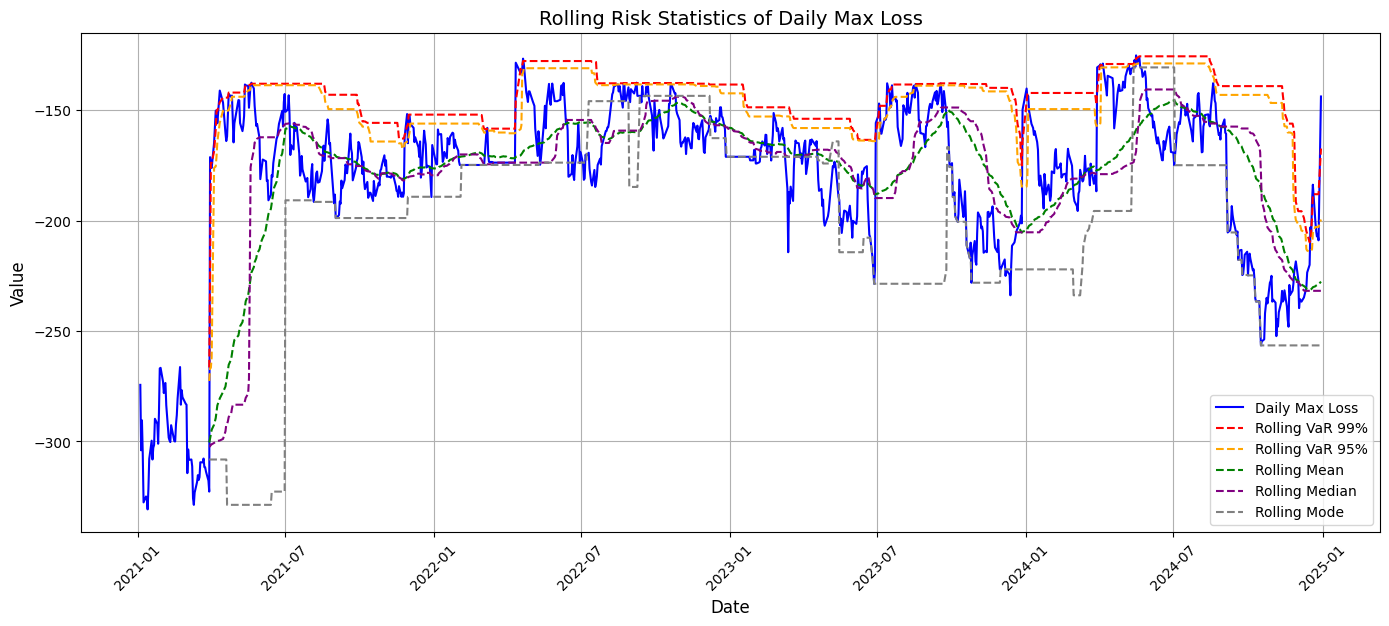

In [23]:
plt.figure(figsize=(14, 6))

plt.plot(daily_max_loss.index, daily_max_loss, label='Daily Max Loss', color='blue')
plt.plot(rolling_var_99, label='Rolling VaR 99%', color='red', linestyle='--')
plt.plot(rolling_var_95, label='Rolling VaR 95%', color='orange', linestyle='--')
plt.plot(rolling_mean, label='Rolling Mean', color='green', linestyle='--')
plt.plot(rolling_median, label='Rolling Median', color='purple', linestyle='--')
plt.plot(rolling_mode, label='Rolling Mode', color='gray', linestyle='--')

plt.title("Rolling Risk Statistics of Daily Max Loss", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


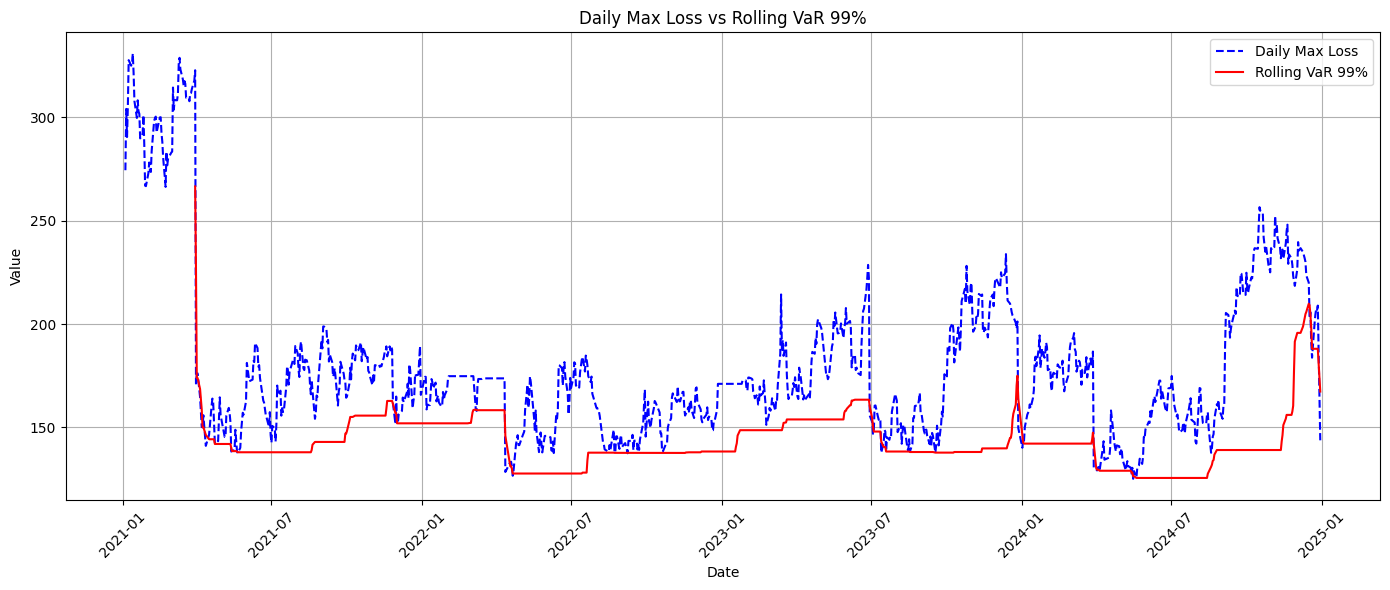

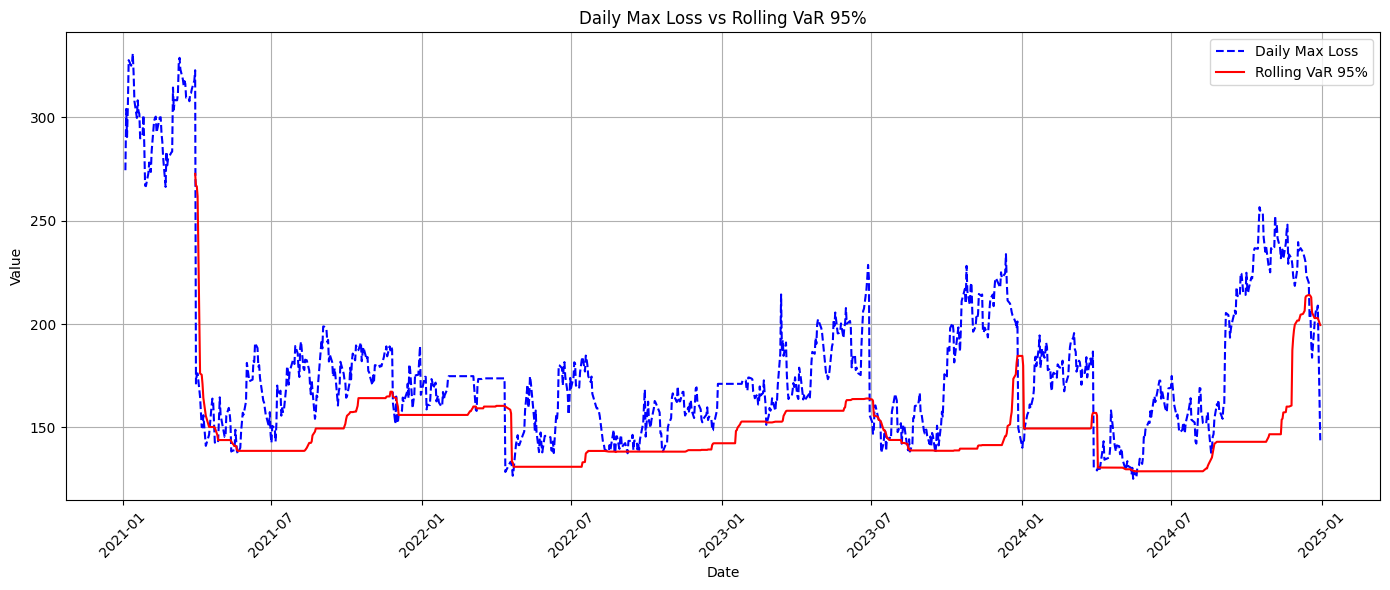

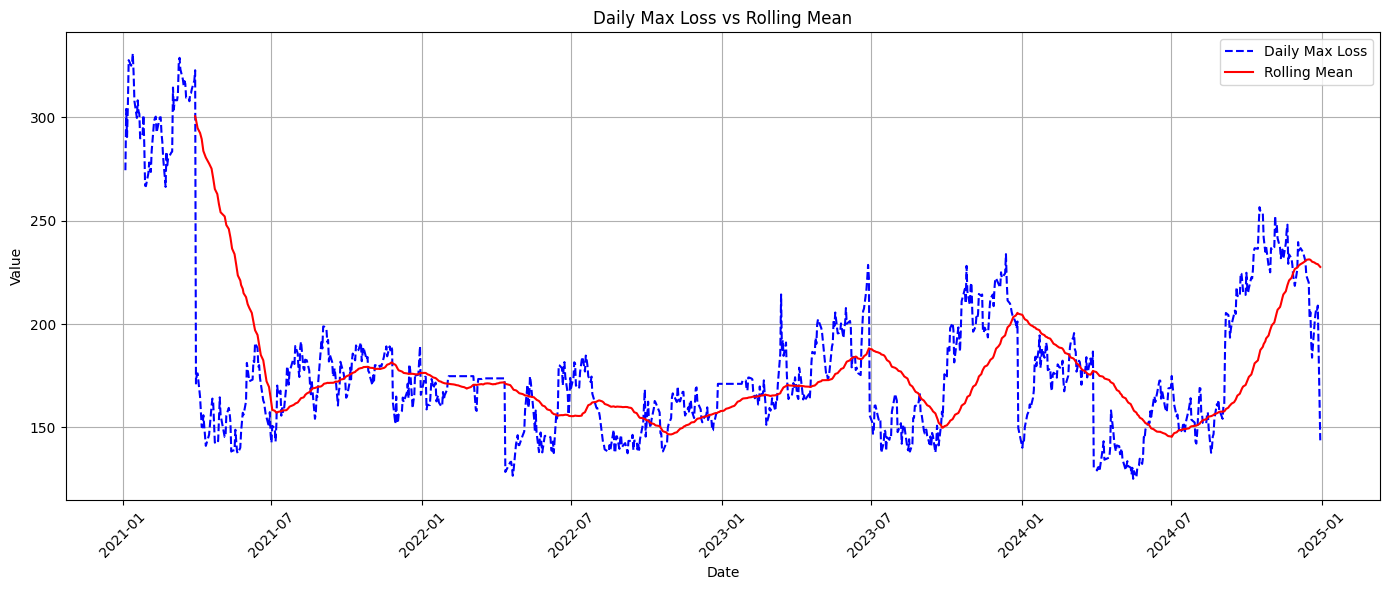

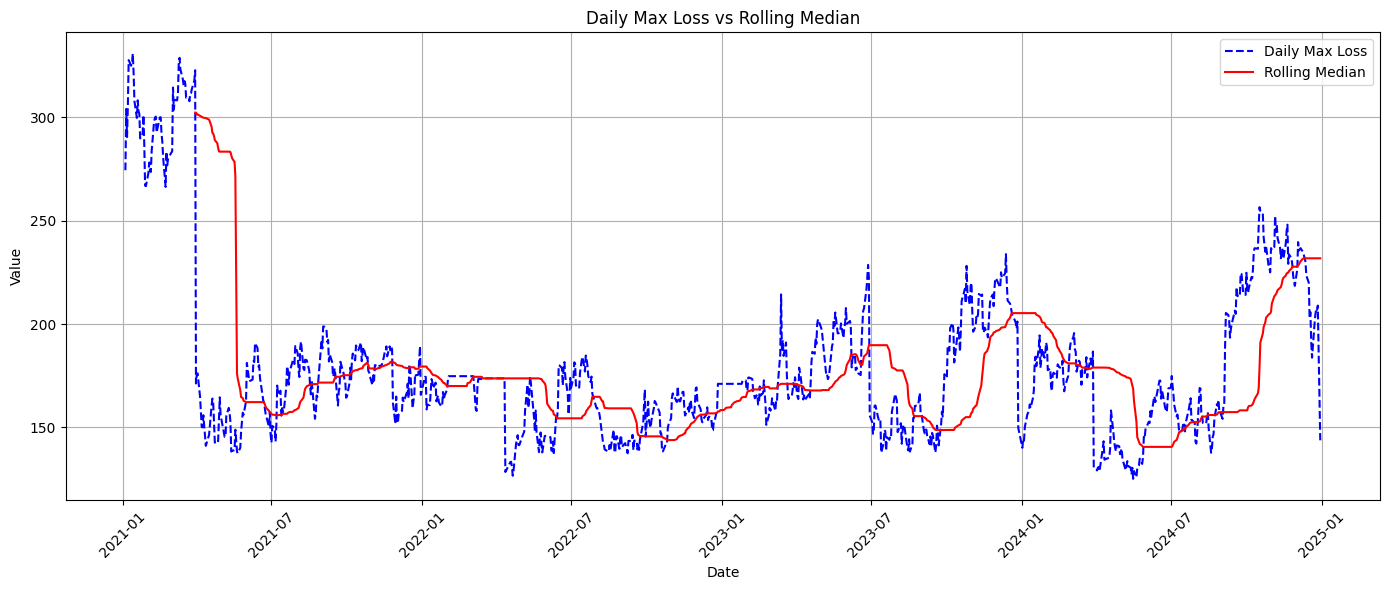

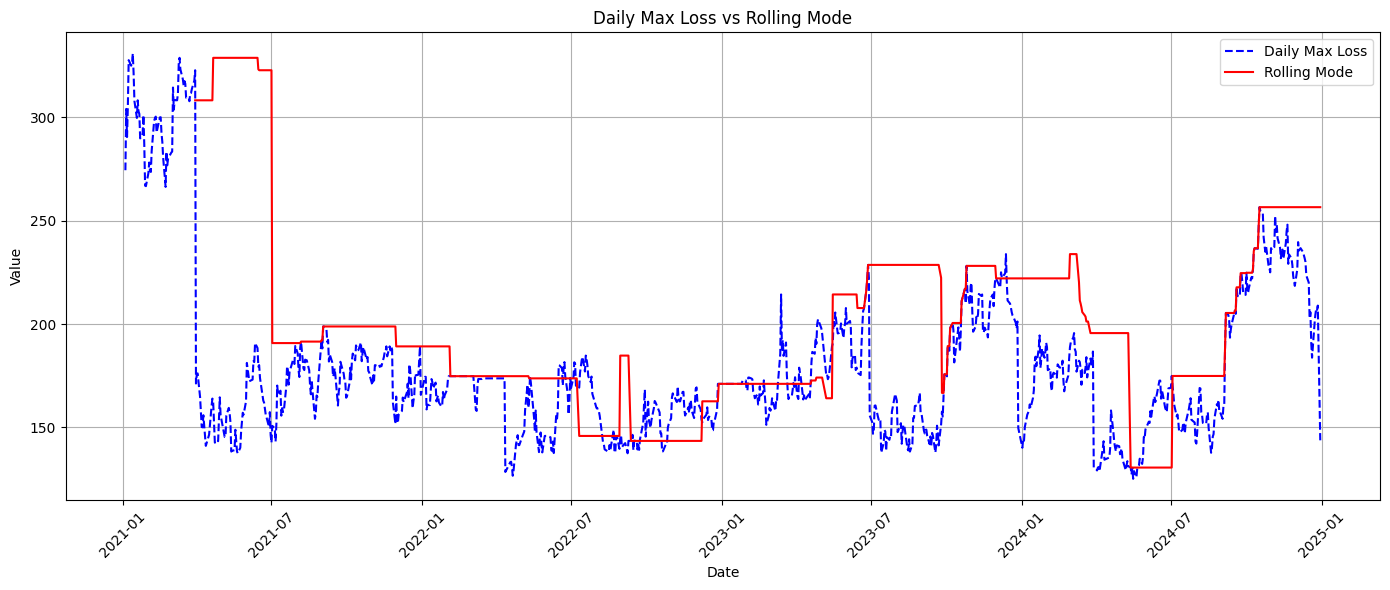

In [28]:
import matplotlib.pyplot as plt

# รวม rolling metrics ทั้งหมดไว้ใน dict
metrics = {
    'Rolling VaR 99%': -rolling_var_99,
    'Rolling VaR 95%': -rolling_var_95,
    'Rolling Mean': -rolling_mean,
    'Rolling Median': -rolling_median,
    'Rolling Mode': -rolling_mode
}

for label, series in metrics.items():
    plt.figure(figsize=(14, 6))  # Create a new figure for each plot
    plt.plot(daily_max_loss.index, -daily_max_loss, label='Daily Max Loss', color='blue', linestyle='--')
    plt.plot(series.index, series, label=label, color='red')
    plt.ylabel("Value")
    plt.xlabel("Date")
    plt.title(f"Daily Max Loss vs {label}")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
# # สร้าง subplot สำหรับแต่ละเส้น
# fig, axs = plt.subplots(len(metrics), 1, figsize=(14, 14), sharex=True)

# # วน plot แต่ละคู่: Daily Max Loss vs Metric
# for ax, (label, series) in zip(axs, metrics.items()):
#     ax.plot(daily_max_loss.index, daily_max_loss, label='Daily Max Loss', color='blue', linestyle='--')
#     ax.plot(series.index, series, label=label, color='red')
#     ax.set_ylabel("Value")
#     ax.set_title(f"Daily Max Loss vs {label}")
#     ax.grid(True)
#     ax.legend()

# # ตั้งชื่อแกน X ที่ subplot ล่างสุด
# axs[-1].set_xlabel("Date")
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()


In [25]:
rolling_var_99.describe()

count    910.000000
mean    -143.307043
std       13.609266
min     -266.508300
25%     -151.979600
50%     -139.071600
75%     -137.792900
max     -125.568900
dtype: float64

In [26]:
So = pd.read_csv(r"C:\Users\Asus\Documents\Coding\SET code\SOMC\Historical Price Short Option Minimum Charge(DATA).csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Asus\\Documents\\Coding\\SET code\\SOMC\\Historical Price Short Option Minimum Charge(DATA).csv'

In [ ]:
So['SOMC'] = So['Short Option Minimum Charge  (Baht)']

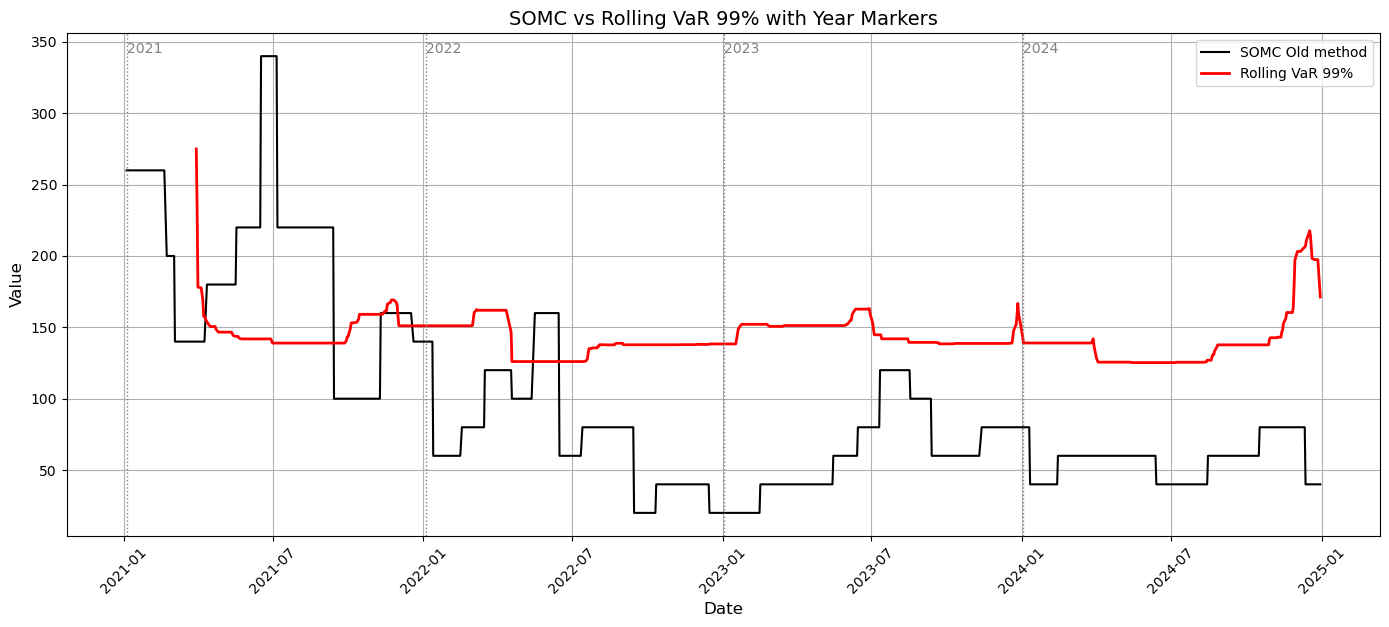

In [ ]:
# เตรียมข้อมูล SOMC
somc_series = So[['Date', 'SOMC']].dropna()
somc_series['Date'] = pd.to_datetime(somc_series['Date'])

# เตรียมข้อมูล rolling_var_99 (ต้องมี index เป็น datetime ด้วย)
rolling_var_99 = rolling_var_99.dropna()  # กรอง NaN ออก

# สร้างกราฟ
plt.figure(figsize=(14, 6))
plt.plot(somc_series['Date'], somc_series['SOMC'], label='SOMC Old method', color='black')

# เส้น rolling VaR 99%
plt.plot(rolling_var_99.index, rolling_var_99.values*-1, label='Rolling VaR 99%', color='red', linewidth=2)

# เส้นแบ่งปี
years = somc_series['Date'].dt.year.unique()
for year in years:
    first_day = somc_series[somc_series['Date'].dt.year == year]['Date'].min()
    plt.axvline(x=first_day, color='gray', linestyle=':', linewidth=1)
    plt.text(first_day, somc_series['SOMC'].max(), str(year),
             verticalalignment='bottom', horizontalalignment='left', fontsize=10, color='gray')

# ตกแต่งกราฟ
plt.title("SOMC vs Rolling VaR 99% with Year Markers", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


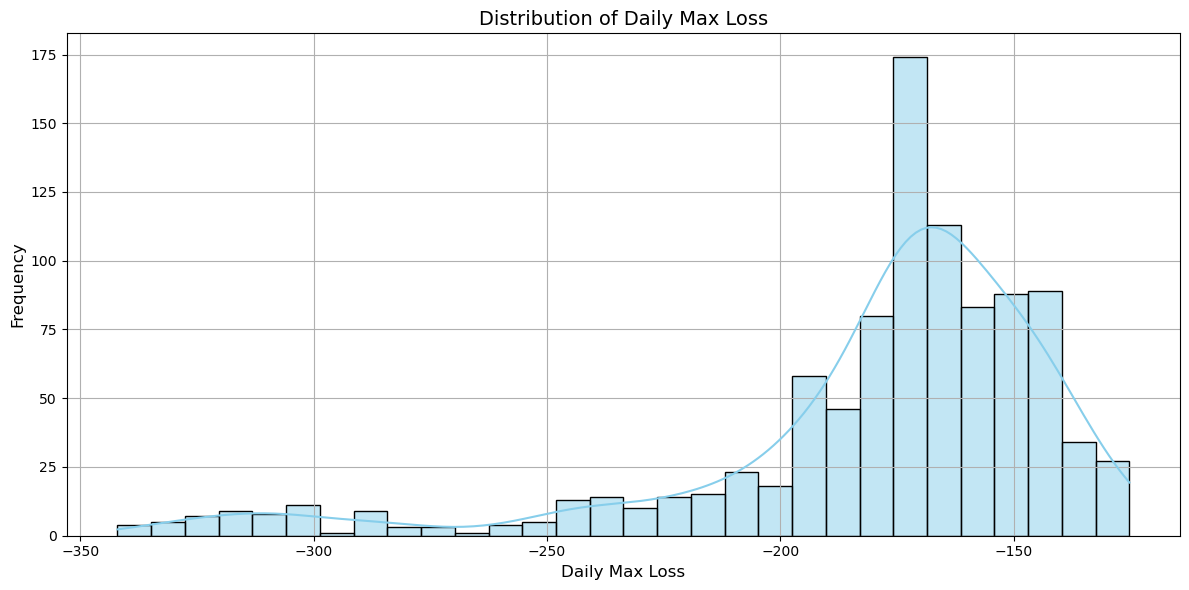

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(daily_max_loss.dropna(), bins=30, kde=True, color='skyblue')

plt.title("Distribution of Daily Max Loss", fontsize=14)
plt.xlabel("Daily Max Loss", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

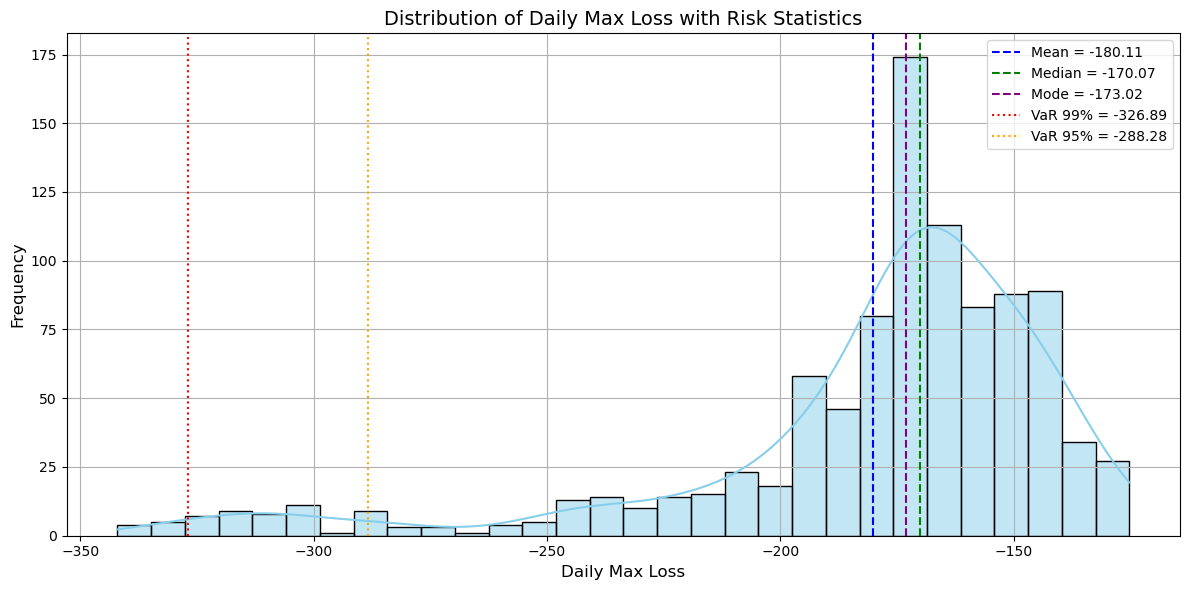

In [ ]:

data = daily_max_loss.dropna()

mean_val = data.mean()
median_val = data.median()
mode_val = mode(data, keepdims=True)[0][0]
var_99 = np.percentile(data, 1)
var_95 = np.percentile(data, 5)

plt.figure(figsize=(12, 6))
sns.histplot(data, bins=30, kde=True, color='skyblue')

# ขีดเส้น
plt.axvline(mean_val, color='blue', linestyle='--', label=f'Mean = {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median = {median_val:.2f}')
plt.axvline(mode_val, color='purple', linestyle='--', label=f'Mode = {mode_val:.2f}')
plt.axvline(var_99, color='red', linestyle=':', label=f'VaR 99% = {var_99:.2f}')
plt.axvline(var_95, color='orange', linestyle=':', label=f'VaR 95% = {var_95:.2f}')

plt.title("Distribution of Daily Max Loss with Risk Statistics", fontsize=14)
plt.xlabel("Daily Max Loss", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
metrics = {
    'Rolling VaR 99%': rolling_var_99
    # 'Rolling VaR 95%': rolling_var_95,
    # 'Rolling Mean': rolling_mean,
    # 'Rolling Median': rolling_median,
    # 'Rolling Mode': rolling_mode,
    # 'Rolling ES 99%': rolling_es_99
}

# สร้าง subplot สำหรับแต่ละเส้น
fig, axs = plt.subplots(len(metrics), 1, figsize=(14, 16), sharex=True)

# วน plot แต่ละคู่: Daily Max Loss vs Metric
for ax, (label, series) in zip(axs, metrics.items()):
    ax.plot(daily_max_loss.index, daily_max_loss, label='Daily Max Loss', color='blue', linestyle='--')
    ax.plot(series.index, series, label=label, color='red')
    ax.set_ylabel("Value")
    ax.set_title(f"Daily Max Loss vs {label}")
    ax.grid(True)
    ax.legend()

# ตั้งชื่อแกน X ที่ subplot ล่างสุด
axs[-1].set_xlabel("Date")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


NameError: name 'rolling_var_99' is not defined

In [ ]:
payoff_series_list = []

for i in range(1, 55):
    df_name = f'df_{i}_2'
    if df_name in globals():
        df = globals()[df_name]
        
        # ข้ามถ้าไม่ใช่ DataFrame
        if not isinstance(df, pd.DataFrame):
            continue
        
        # ใช้เฉพาะค่าที่ไม่ใช่ NaN และ > 0
        df_clipped = df.clip(lower=0)
        
        # คำนวณ average payoff รายวัน (ข้าม NaN โดย default)
        avg_series = df_clipped.mean(axis=1, skipna = True)
        
        # เก็บไว้
        payoff_series_list.append(avg_series)

# รวมทั้งหมดเป็น DataFrame (แนวตั้งตามวัน)
combined_avg_df = pd.concat(payoff_series_list, axis=1)

# คำนวณค่าเฉลี่ยข้าม expiry group
daily_avg_payoff = combined_avg_df.mean(axis=1)
daily_avg_payoff = daily_avg_payoff.ffill().infer_objects()
# แสดงผลเบื้องต้น
print(daily_avg_payoff.describe())
print(daily_avg_payoff.head(10))


count    969.000000
mean      37.076225
std        3.781983
min       31.097980
25%       34.805417
50%       36.025385
75%       38.266792
max       58.645556
dtype: float64
Date
2021-01-04    46.074853
2021-01-05    50.460870
2021-01-06    51.454545
2021-01-07    51.829545
2021-01-08    55.693235
2021-01-11    57.821111
2021-01-12    55.670000
2021-01-13    58.645556
2021-01-14    57.063333
2021-01-15    55.390000
dtype: float64


Date
2021-01-04    46.074853
2021-01-05    50.460870
2021-01-06    51.454545
2021-01-07    51.829545
2021-01-08    55.693235
dtype: float64
count    969.000000
mean      37.076225
std        3.781983
min       31.097980
25%       34.805417
50%       36.025385
75%       38.266792
max       58.645556
dtype: float64


<Axes: title={'center': 'Daily Average Payoff'}, xlabel='Date'>

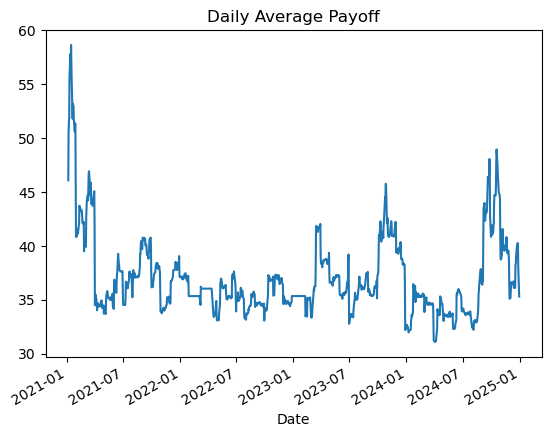

In [ ]:
print(daily_avg_payoff.head())
print(daily_avg_payoff.describe())
daily_avg_payoff.plot(title="Daily Average Payoff")


In [ ]:
import matplotlib.pyplot as plt

metrics = {
    'Rolling VaR 99%': rolling_var_99,
    'Rolling VaR 95%': rolling_var_95,
    'Rolling Mean': rolling_mean,
    'Rolling Median': rolling_median,
    'Rolling Mode': rolling_mode,
}

plt.figure(figsize=(14, 6))

# Plot เส้น payoff ปกติ
plt.plot(daily_avg_payoff.index, daily_avg_payoff, label='Daily Avg Payoff', color='black', linewidth=2)

# Plot เส้น metric ที่ถูกคูณ -1
for label, series in metrics.items():
    plt.plot(series.index, -series, label=f'{label} (× -1)')  # <–– คูณตรงนี้

# ตกแต่งกราฟ
plt.title("Daily Avg Payoff vs Negative Risk Metrics", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


NameError: name 'rolling_var_99' is not defined

In [ ]:
rolling_var_avr_99 = daily_avg_payoff.rolling(window=window).quantile(0.99)

In [ ]:
rolling_var_avr_99

Date
2021-01-04          NaN
2021-01-05          NaN
2021-01-06          NaN
2021-01-07          NaN
2021-01-08          NaN
                ...    
2024-12-24    48.232327
2024-12-25    48.232327
2024-12-26    48.232327
2024-12-27    48.232327
2024-12-30    48.232327
Length: 969, dtype: float64

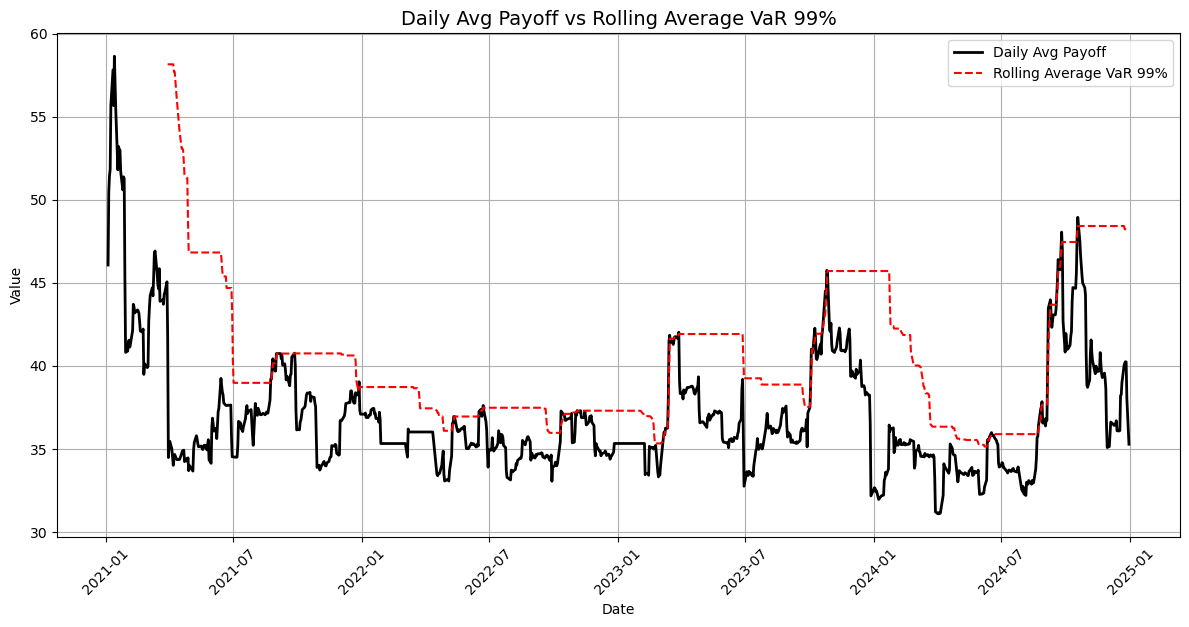

In [ ]:
plt.figure(figsize=(12, 6))

# Plot daily average payoff (เส้นจริงของแต่ละวัน)
plt.plot(daily_avg_payoff.index, daily_avg_payoff, label='Daily Avg Payoff', color='black', linewidth=2)

# Plot rolling average ของ VaR 99%
plt.plot(rolling_var_avr_99.index, rolling_var_avr_99, label='Rolling Average VaR 99%', color='red', linestyle='--')

# ตกแต่งกราฟ
plt.title("Daily Avg Payoff vs Rolling Average VaR 99%", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()